# AI Jukebox

### Generate Midi File
Plug in trained weights and notes file to generate midi.  

In [1]:
# uncomment the below to force CPU
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import sys
from datetime import datetime
import re
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import functions as fxn

/Users/brianmcmahon/anaconda3/envs/MusicGenerator1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
sys.executable

'/Users/brianmcmahon/anaconda3/envs/MusicGenerator1/bin/python'

In [3]:
subfolder = '../trained/Classical/'
weight_file = subfolder + 'Classical_weights_201804041329.hdf5'
note_file = subfolder + 'Classical_inputnotes_201804041329'
history_file = subfolder + 'Classical_history_201804041329.pkl'
output_file = subfolder + 'Classical_outputnotes_201804041329'

timestamp = re.sub(r'[-: ]','',str(datetime.now()).split('.')[0])[:-2]
output_name = weight_file.split('/')[-2]

sequence_length = 200 # the LSTM RNN will consider this length note sequence to predict/generate each following note
output_tag = '../trained/Classical/midi_{}_{}_'.format(output_name,timestamp)
notes_generated = 500

temperature = 1.2
offset_adj = 0.5

In [4]:
# convert fully trained weights to midi file
def weights_to_midi(note_file, sequence_length, weight_file, temperature, offset_adj):
    with open(note_file, 'rb') as filepath:
        notes = pickle.load(filepath)
    network_input, network_output, n_patterns, n_vocab, pitchnames = fxn.prepare_sequences(notes, sequence_length)
    normalized_input = fxn.reshape_for_creation(network_input, n_patterns, sequence_length, n_vocab)
    model = fxn.create_network(normalized_input, n_vocab, weight_file)
    prediction_output= fxn.generate_notes(model, network_input, pitchnames,sequence_length, notes_generated, n_vocab, temperature)
    output_notes, midi_file = fxn.create_midi(prediction_output, output_tag, sequence_length, offset_adj)
    return output_notes, model, midi_file

In [5]:
# terminal_output = output_tag + 'terminal.log'
# sys.stdout = ut.Logger(terminal_output)
# print("Terminal output being saved at {}".format(terminal_output))
output_notes, model, midi_file = weights_to_midi(note_file, sequence_length, weight_file, temperature, offset_adj)
# print("Run Complete. Terminal log saved at {}".format(terminal_output))


**Preparing sequences for training**
Pitchnames (unique notes/chords from 'notes') at length 1385: ['0', '0.1', '0.1.2', '0.1.2.3', '0.1.2.3.4', '0.1.2.3.4.5', '0.1.2.3.4.5.6', '0.1.2.3.4.5.6.7', '0.1.2.3.4.5.6.7.8', '0.1.2.3.4.5.6.7.8.9.10', '0.1.2.3.4.5.6.7.8.9.10.11', '0.1.2.3.4.5.6.8.10', '0.1.2.3.4.7.9', '0.1.2.3.5', '0.1.2.3.5.6.7.8.9', '0.1.2.3.5.7', '0.1.2.3.6.7', '0.1.2.3.7', '0.1.2.4', '0.1.2.4.5', '0.1.2.4.5.6', '0.1.2.4.6.7', '0.1.2.5', '0.1.2.5.6', '0.1.2.5.6.7.8', '0.1.2.5.6.9', '0.1.2.5.7', '0.1.2.6', '0.1.2.6.7', '0.1.2.7', '0.1.3', '0.1.3.4', '0.1.3.4.5.6.7.8', '0.1.3.4.5.7', '0.1.3.4.6', '0.1.3.4.6.9', '0.1.3.4.7', '0.1.3.4.7.9', '0.1.3.4.8', '0.1.3.5.6', '0.1.3.5.6.8', '0.1.3.5.7.9', '0.1.3.6', '0.1.3.6.8', '0.1.4', '0.1.4.5', '0.1.4.5.6.8', '0.1.4.5.7', '0.1.4.5.7.8', '0.1.4.7', '0.1.4.7.8', '0.1.5', '0.1.5.6', '0.1.5.7', '0.1.5.8', '0.1.6', '0.1.6.7', '0.2', '0.2.3', '0.2.3.4', '0.2.3.4.6', '0.2.3.5', '0.2.3.5.6', '0.2.3.5.6.7.9', '0.2.3.5.7', '0.2.3.5.8', '0.2.3.

Network input and output created with (pre-transform) lengths 190865 and 190865
Lengths. N Vocab: 1385 N Patterns: 190865 Pitchnames: 1385

**Preparing sequences for output**
Network Input of length 190865 is reshaped to normalized input of (190865, 200, 1)

**LSTM model initializing**
Input nodes: 512 Dropout: 0.5
Input shape (timesteps, data_dim): (200,1)
Weights file loaded

**Generating notes**
Length Pitchnames: 1385
Integer to note conversion at length: 1385
Network input length: 190865
Pattern ends with length 200 and type <class 'list'>
Generated Note Length: 500
First 100: ['1.3.4', '0', '0', '0', '0', '1.3.4', 'B0', '0', '8.9.1', '0', 'E-6', '0', '2.3.4.6', '0', '0', '0', '0', '0', '0', '0', '1.6', '11.1.4', '11.1.4', '0', '0', 'B6', '0', '0', '5', '8.9.10', '1.5.8', '0', '6.7', '3.5', '0', '0', '0', '0', '0', '0', '0.1.3', '11.3.5.6.7', 'B-6', 'C#6', '0', '0', 'D3', 'B-5', '6.10.1', '0', '8.11.1', '0', '0', '6.9.0', '0.5.6', '4.8.9.10.11', '0', '0.5.6', '0', 'B3', '7.8.0', '

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1024)              2105344   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1385)              710505    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1385)              0         
_________________________________________________________________
activation_1 (Activation)    (None, 1385)              0         
Total params: 3,340,649
Trainable params: 3,340,649
Non-trainable params: 0
_________________________________________________________________


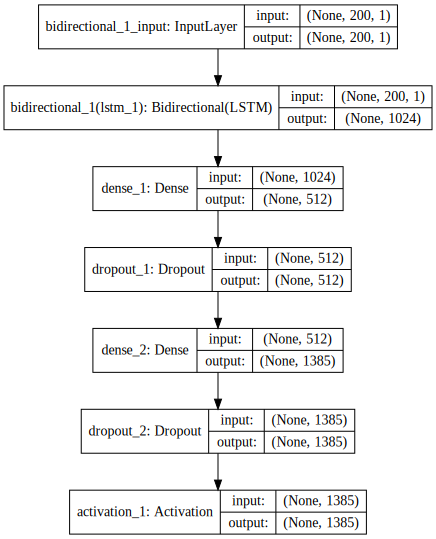

In [7]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
history = pd.read_pickle(history_file)

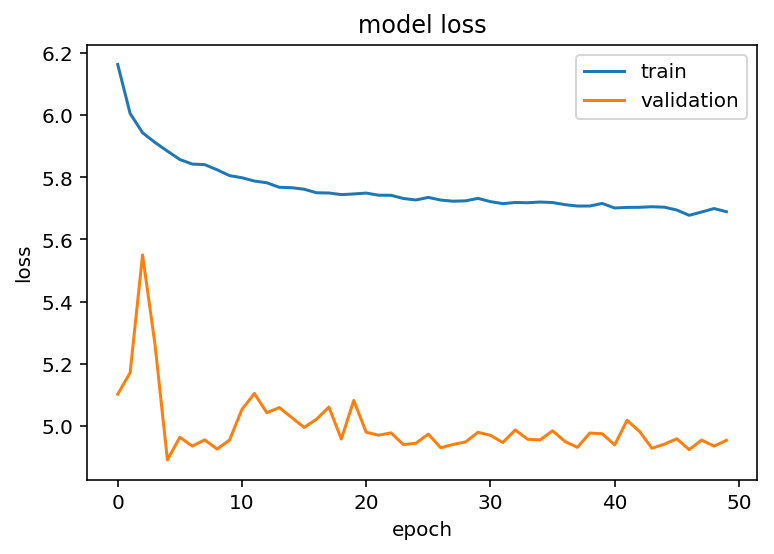

In [9]:
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [10]:
output_notes = pd.read_pickle(output_file)

In [11]:
output_notes

[<music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord E>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.note.Note C#>,
 <music21.chord.Chord A B D F>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord E- F# G# B- B>,
 <music21.chord.Chord C>,
 <music21.note.Note B->,
 <music21.chord.Chord C# E->,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Chord C>,
 <music21.chord.Ch

### Analyze created MIDI

In [12]:
import pretty_midi
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import IPython.display as ipd

In [13]:
fs = 16000
rate = 16000
start_pitch = 24
end_pitch = 84

In [14]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=10):
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    
def analyze_midi(midi_file):
    instrument_dict = {}
    pm = pretty_midi.PrettyMIDI(midi_file)
    plt.figure(figsize=(12, 6))
    plot_piano_roll(pm, start_pitch, end_pitch)
    print("Time Signature Changes: {} Instruments: {}".format(len(pm.time_signature_changes), len(pm.instruments)))
    for instrument_num in range(len(pm.instruments)):
        instrument_dict[instrument_num] = {'Notes': len(pm.instruments[instrument_num].notes), 
                                           'Pitch_Bends':len(pm.instruments[instrument_num].pitch_bends),
                                           'Control_Changes':len(pm.instruments[instrument_num].control_changes)}
    instrument_dict = pd.DataFrame(instrument_dict)
    return instrument_dict, pm

Time Signature Changes: 0 Instruments: 1


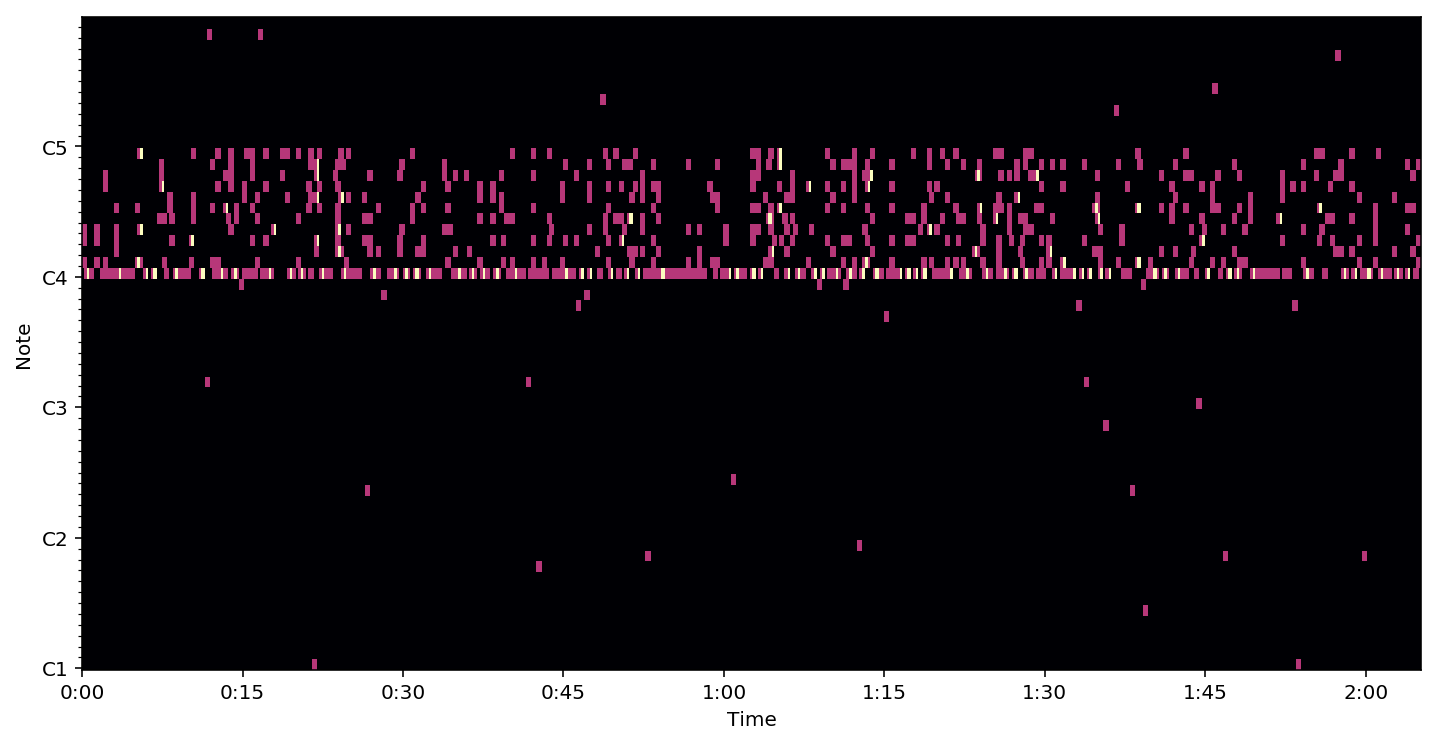

In [15]:
# midi_file = 'output/201803281154-100-lstm_midi.mid'
instrument_dict,pm = analyze_midi(midi_file)
ipd.Audio(pm.synthesize(fs=fs), rate=rate)

### Music21

In [16]:
from music21 import *

env = environment.Environment()
env['musicxmlPath'] = '/usr/bin/musescore'
env['lilypondPath'] = '/usr/bin/lilypond'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'
env['pdfPath'] = '/usr/bin/lilypond'
env['graphicsPath'] = '/usr/bin/lilypond'

In [17]:
note_stream = stream.Stream()
for note in output_notes:
    note_stream.append(note)
    print(note)
# note_stream.show()

<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord E>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.note.Note C#>
<music21.chord.Chord A B D F>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord E- F# G# B- B>
<music21.chord.Chord C>
<music21.note.Note B->
<music21.chord.Chord C# E->
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord C>
<music21.chord.Chord B C#>
<music21.chord.Ch